In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
sns.set()

In [4]:
data=pd.read_csv('auto-mpg.csv')

In [5]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


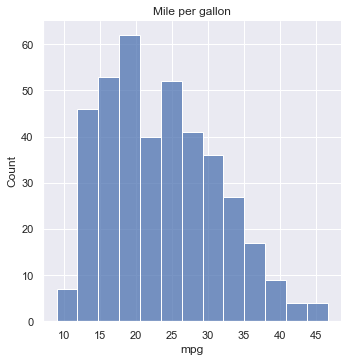

In [15]:
sns.displot(data['mpg'])
plt.title('Mile per gallon')
plt.show()

c:\users\len\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


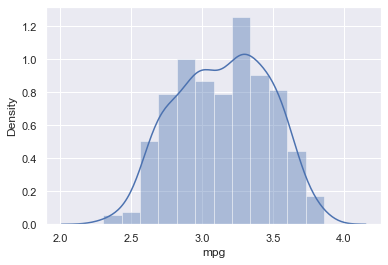

In [20]:
from scipy.stats import norm
sns.distplot(np.log1p(data['mpg']))
plt.show()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [12]:
data['car name'].value_counts()

ford pinto                           6
toyota corolla                       5
ford maverick                        5
amc matador                          5
amc hornet                           4
                                    ..
oldsmobile cutlass ciera (diesel)    1
hi 1200d                             1
honda accord lx                      1
ford f250                            1
amc spirit dl                        1
Name: car name, Length: 305, dtype: int64

In [14]:
data=data.drop(['car name'],axis=1)

In [22]:
data['displacement'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: displacement, Length: 398, dtype: bool

In [37]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [31]:
data['mpg']=np.log(data['mpg'])

c:\users\len\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


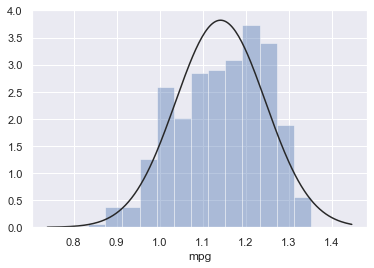

In [32]:
sns.distplot(data['mpg'],fit=norm,kde=False)
plt.show()

c:\users\len\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


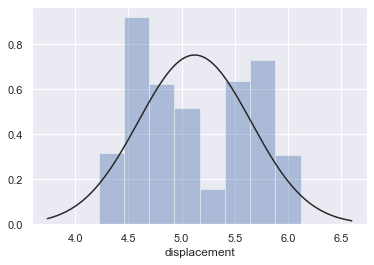

In [33]:
sns.distplot(np.log(data['displacement']),fit=norm, kde= False)
plt.show()

In [34]:
corr=data.corr()
corr['mpg']

mpg             1.000000
cylinders      -0.833018
displacement   -0.860745
horsepower     -0.839585
weight         -0.881576
acceleration    0.450225
model year      0.572937
origin          0.553030
Name: mpg, dtype: float64

c:\users\len\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


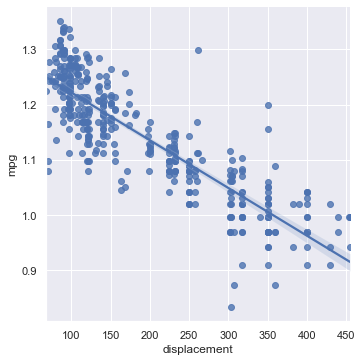

In [41]:
sns.lmplot('displacement','mpg',data=data)
plt.show()

In [38]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
data[['horsepower']]=imputer.fit_transform(data[['horsepower']])

In [39]:
data['horsepower'].isnull().sum()

0

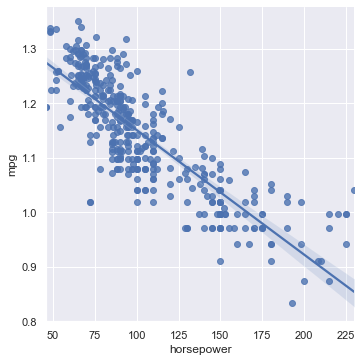

In [43]:
sns.lmplot('horsepower','mpg',data=data)
plt.show()

c:\users\len\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


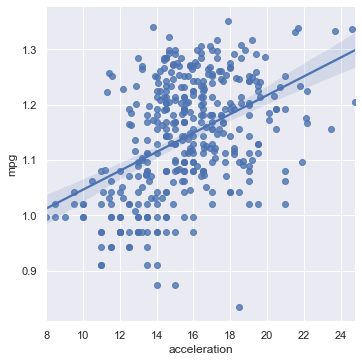

In [44]:
sns.lmplot('acceleration','mpg',data=data)
plt.show()

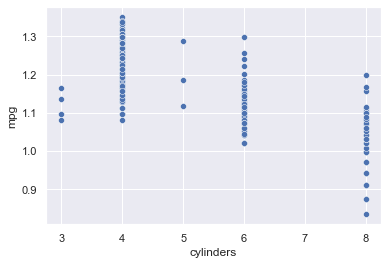

In [45]:
sns.scatterplot(x=data['cylinders'],y=data['mpg'])
plt.show()

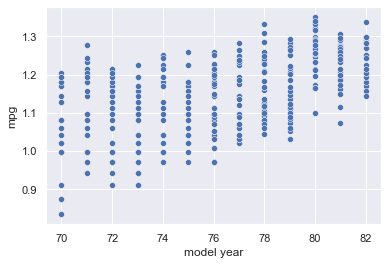

In [46]:
sns.scatterplot(x=data['model year'],y=data['mpg'])
plt.show()

In [48]:
data[(data['cylinders'] == 8) & (data['mpg'] < .9)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
25,0.874591,8,360.0,215.0,4615,14.0,70,1
26,0.874591,8,307.0,200.0,4376,15.0,70,1
28,0.834032,8,304.0,193.0,4732,18.5,70,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split

In [51]:
data.drop([28],axis=0)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,1.079918,8,307.0,130.0,3504,12.0,70,1
1,1.019781,8,350.0,165.0,3693,11.5,70,1
2,1.079918,8,318.0,150.0,3436,11.0,70,1
3,1.041412,8,304.0,150.0,3433,12.0,70,1
4,1.061385,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,1.203634,4,140.0,86.0,2790,15.6,82,1
394,1.336753,4,97.0,52.0,2130,24.6,82,2
395,1.251765,4,135.0,84.0,2295,11.6,82,1
396,1.214110,4,120.0,79.0,2625,18.6,82,1


In [52]:
output=data['mpg']
output

0      1.079918
1      1.019781
2      1.079918
3      1.041412
4      1.061385
         ...   
393    1.203634
394    1.336753
395    1.251765
396    1.214110
397    1.242925
Name: mpg, Length: 398, dtype: float64

In [54]:
input=data.drop(['mpg'],axis=1)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input,output,test_size=0.20,random_state=0)

In [78]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
pred=np.exp(model.predict(X_test))

In [79]:
pred

array([2.69818351, 3.20827376, 2.66378739, 3.0548012 , 2.91639687,
       3.40278492, 3.56376997, 3.16306426, 2.74951736, 3.27432158,
       3.54484563, 3.58497578, 3.05918668, 3.27842634, 2.81502248,
       3.48225813, 3.3759727 , 3.3739835 , 2.91114397, 3.47861424,
       2.74642588, 3.22123874, 3.25804058, 3.02073698, 3.4422978 ,
       3.28824469, 3.50761488, 3.44481151, 3.43031621, 2.91684234,
       3.00917502, 3.44083139, 3.04740618, 3.50187444, 3.13876189,
       3.22414772, 3.05699681, 2.81873898, 3.528103  , 2.52700368,
       2.5553893 , 2.72220195, 3.29904262, 3.4216838 , 3.44611971,
       3.11486368, 3.11492534, 2.70243046, 3.10784239, 3.36899696,
       3.49707203, 3.28755607, 2.79733411, 3.24348747, 2.75573359,
       2.52203854, 2.98537847, 3.24770897, 3.46493177, 2.7867873 ,
       3.03165037, 3.26052278, 3.08399162, 2.98469457, 2.6080753 ,
       2.66793458, 2.57768965, 2.98365974, 3.19943125, 2.56390376,
       3.60881533, 2.61924809, 3.06547914, 2.96352881, 3.15649

In [80]:
r_square=model.score(X_test,y_test)
r_square

0.8879891136443449

In [61]:
from sklearn.feature_selection import f_regression
f = f_regression(X_test,y_test)
f

(array([241.4134427 , 252.21181136, 141.56378812, 337.14080632,
          9.88620386,  42.8458615 ,  29.2774059 ]),
 array([1.36607545e-25, 3.71645575e-26, 3.29369995e-19, 4.79196417e-30,
        2.35601971e-03, 5.68754173e-09, 6.68207852e-07]))

In [63]:
coef=model.coef_
coef

array([-6.52043426e-03,  1.64345674e-04, -5.18511149e-04, -7.69045728e-05,
        3.90571450e-04,  8.84786821e-03,  1.08171458e-02])

In [64]:
inter=model.intercept_
inter

0.7309870181632303

In [81]:
import statsmodels.api as sm
X_train_new=sm.add_constant(X_train)
X_train_new

,const,cylinders,displacement,horsepower,weight,acceleration,model year,origin
64,1.0,8,318.0,150.0,4135,13.5,72,1
55,1.0,4,97.0,60.0,1834,19.0,71,2
317,1.0,4,97.0,78.0,2188,15.8,80,2
102,1.0,4,97.0,46.0,1950,21.0,73,2
358,1.0,4,120.0,74.0,2635,18.3,81,3
...,...,...,...,...,...,...,...,...
323,1.0,4,156.0,105.0,2800,14.4,80,1
192,1.0,6,250.0,105.0,3353,14.5,76,1
117,1.0,4,68.0,49.0,1867,19.5,73,2
47,1.0,6,250.0,100.0,3282,15.0,71,1


In [82]:
model=sm.OLS(y_train,X_train_new)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     340.4
Date:                Wed, 11 Nov 2020   Prob (F-statistic):          2.02e-141
Time:                        16:51:58   Log-Likelihood:                 613.47
No. Observations:                 318   AIC:                            -1211.
Df Residuals:                     310   BIC:                            -1181.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7310      0.055     13.254   